<a href="https://colab.research.google.com/github/putudewik/DataAnalytics/blob/main/datavisualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [122]:
ls

data.csv


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  data.csv.zip
  inflating: data.csv                


In [8]:
!pip install squarify

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
from matplotlib.colors import ListedColormap
from decimal import *
from wordcloud import WordCloud, STOPWORDS
import squarify
import warnings
warnings.filterwarnings('ignore')

In [11]:
df_fifa = pd.read_csv("data.csv")
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Dropping the unnamed: 0 column
df_fifa = df_fifa.drop("Unnamed: 0", 1)

In [13]:
# Checking shape or the dataset
print("Shape of the Dataset is: ", df_fifa.shape)

Shape of the Dataset is:  (18207, 88)


In [14]:
# Checking how many columns are present in the dataset 
df_fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [15]:
# Information about dataset
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [16]:
df_fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [17]:
# Checking if there any null value present in the dataset or not
df_fifa.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [19]:
# Checking if there any duplicate present in the dataset or not
df_fifa.duplicated().sum()

0

In [21]:
# Checking unique value for features / count number of unique values
df_fifa["Nationality"].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [22]:
df_fifa["Club"].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [23]:
df_fifa["Age"].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44])

In [25]:
# Checking who is the oldest player in the dataset
df_fifa[df_fifa["Age"] == df_fifa["Age"].max()]["Name"]

4741    O. Pérez
Name: Name, dtype: object

In [26]:
# Checking who is the youngest player in the dataset
df_fifa[df_fifa["Age"] == df_fifa["Age"].min()]["Name"]

11457        W. Geubbels
11732           A. Taoui
12496     Pelayo Morilla
12828           Guerrero
13293        H. Massengo
13567     Y. Verschaeren
15363          Y. Roemer
15746        Y. Begraoui
15793           J. Lahne
16081        J. Italiano
16254          S. Steijn
16418        J. Kitolano
16544         D. Adshead
16927          B. Nygren
17091           A. Doğan
17115         C. Bassett
17175           B. Mumba
17177           R. Gómez
17200       H. Andersson
17263    P. Samiec-Talar
17354        L. D'Arrigo
17712           K. Broda
17743          J. Olstad
17751           E. Ceide
17753           B. Waine
17757           L. Smyth
17776     M. Köstenbauer
17808       A. Mahlonoko
17841     F. Tauchhammer
17881           R. Hauge
17887           M. Tilio
17921         J. Rowland
17976          M. Larsen
18003       J. Imbrechts
18018        B. O'Gorman
18044            K. Lara
18106          J. Cleary
18124       G. Hollywood
18162       T. Gundelund
18166           N. Ayéva


In [27]:
# Checking value of Lionel Messi in therms of money
df_fifa[df_fifa["Name"] == "L. Messi"]["Value"]

0    €110.5M
Name: Value, dtype: object

In [28]:
# Checking value of Cristiano Ronaldo in therms of money
df_fifa[df_fifa["Name"] == "Cristiano Ronaldo"]["Value"]

1    €77M
Name: Value, dtype: object

In [29]:
# List players who played for Manchester United
df_fifa[df_fifa["Club"] == "Manchester United"]["Name"]

3                 De Gea
45              P. Pogba
47             R. Lukaku
93            A. Sánchez
116           A. Martial
132             N. Matić
211            Juan Mata
250                 Fred
254           J. Lingard
319          M. Rashford
327            E. Bailly
374        Ander Herrera
377          C. Smalling
399          A. Valencia
454              L. Shaw
526            S. Romero
584          V. Lindelöf
629              M. Rojo
654             P. Jones
700          M. Fellaini
717             A. Young
807      Andreas Pereira
1313          M. Darmian
2561            L. Grant
3451         Diogo Dalot
4513        S. McTominay
8191            A. Gomes
10087           T. Chong
10457        E. Hamilton
10461         C. Gribbin
11081           R. Poole
11422        R. Williams
12545           J. Bohui
Name: Name, dtype: object

In [30]:
# List players who are Indians
df_fifa[df_fifa["Nationality"] == "India"]["Name"]

8605          S. Chhetri
10011         S. Jhingan
12598      J. Lalpekhlua
12811    G. Singh Sandhu
13508      A. Edathodika
14054          P. Halder
14199           P. Kotal
14218           L. Ralte
14705             N. Das
14786           U. Singh
14915         H. Narzary
15356           R. Singh
15643           S. Singh
15652           A. Thapa
15855         M. Rafique
15864           A. Singh
15884           B. Singh
16135            S. Bose
16265          R. Borges
16450            S. Paul
16499          A. Mondal
16539    L. Lalruatthara
16793         E. Lyngdoh
16903     J. Lalrinzuala
16976       A. Kuruniyan
17129           J. Singh
17197           V. Kaith
17339           S. Passi
17436     D. Lalhlimpuia
17539           C. Singh
Name: Name, dtype: object

In [31]:
# List of players who are form Brazil and played for Barcelona
df_fifa[(df_fifa["Nationality"] == "Brazil") & (df_fifa["Club"] == "FC Barcelona")]["Name"]

32     Coutinho
228      Arthur
236      Malcom
263     Rafinha
Name: Name, dtype: object

In [43]:
df_fifa["Value"] = df_fifa["Value"].astype(np.int64)
df_fifa["Value"].sample(5)

12563      525000
3076      5500000
17427      140000
9794       500000
866      10000000
Name: Value, dtype: int64

In [63]:
# Convert them to a particular format and change them into numerical values for further operations
def text_to_num(text):
    digit = {'K': 3, 'M': 6}
    new_text = text[1:]
    if new_text[-1] in digit:
        num = new_text[:-1]
        magnitude = new_text[-1]
        return Decimal(num) * 10 ** digit[magnitude]
    else:
        return Decimal(new_text)
    
def convert_into_float(df_fifa):
    cols = ['Value', 'Wage']
    df_fifa[cols] = df_fifa[cols].applymap(text_to_num)
    return df_fifa
(df_fifa)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [64]:
df_fifa["Value"] = df_fifa["Value"].astype(np.int64)
df_fifa["Value"].sample(5)

1866     10500000
2576      3600000
16672      170000
5305      2600000
10048      600000
Name: Value, dtype: int64

In [66]:
# Checking who is the highest paid footballer
df_fifa[df_fifa["Value"] == df_fifa["Value"].max()]["Name"]

2    Neymar Jr
Name: Name, dtype: object

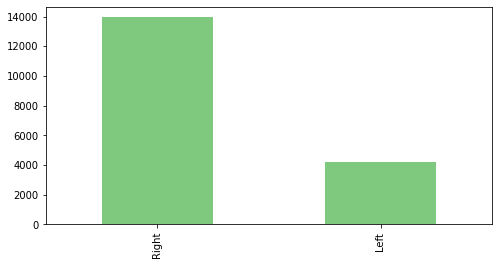

In [67]:
# Bar plot for preferred foot of footballers
plt.figure(figsize = (8, 4))
df_fifa["Preferred Foot"].value_counts().plot(kind = 'bar', colormap = 'Accent');

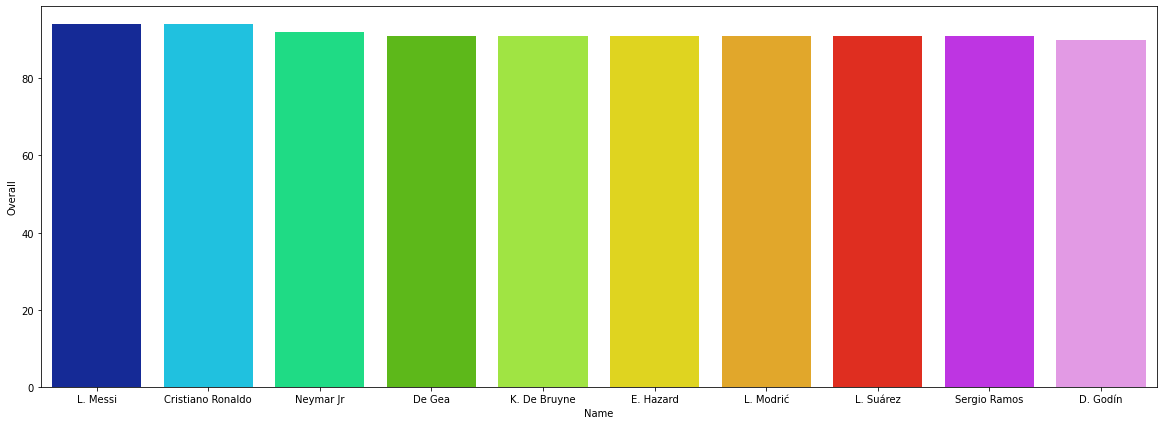

In [68]:
# Bar plot for overall playes rating
df_fifa = df_fifa.sort_values(by = ['Overall'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_fifa["Name"][:10], y = df_fifa["Overall"], palette = "gist_ncar");

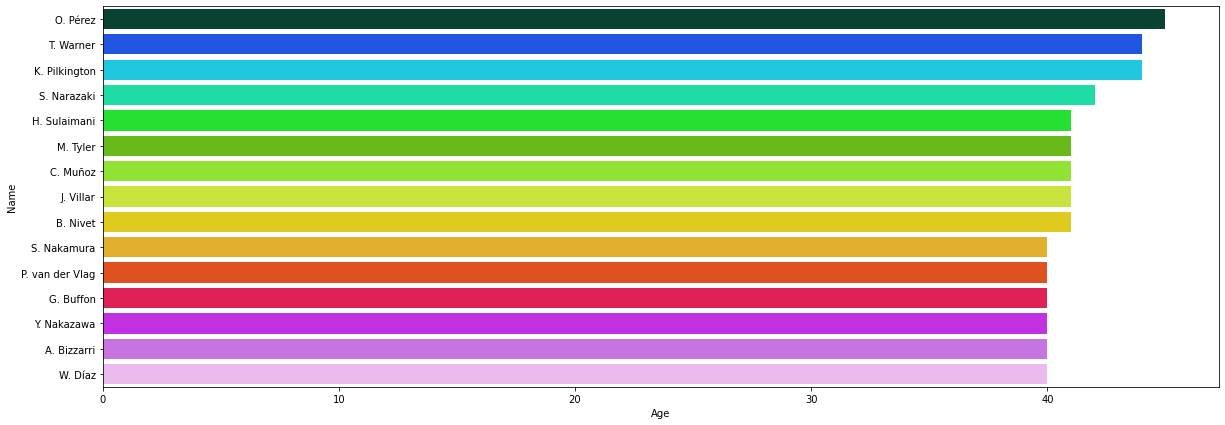

In [69]:
# Bar plot for age distribution amongst players
df_fifa = df_fifa.sort_values(by = ['Age'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_fifa["Age"], y = df_fifa["Name"][:15], palette = "gist_ncar");

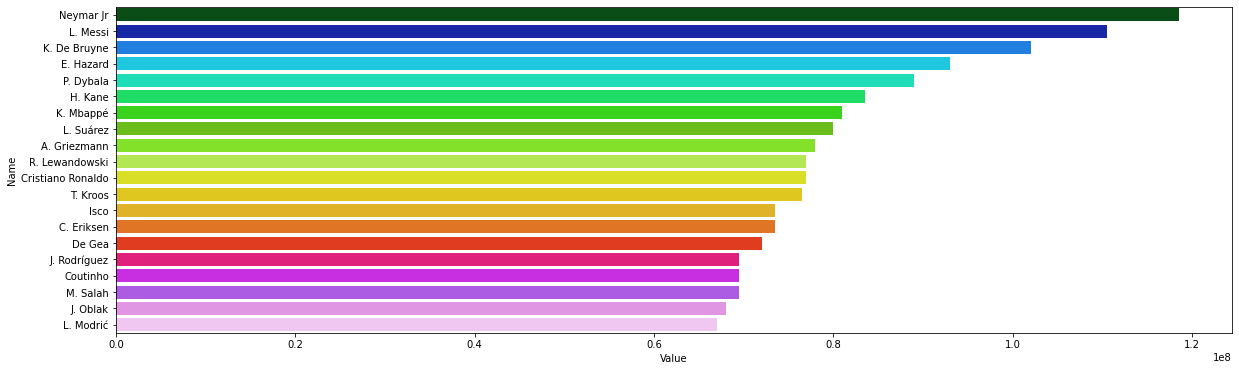

In [70]:
# Bar plot for highest paid (value) players in the world
df_fifa = df_fifa.sort_values(by = ['Value'], ascending = False)
plt.figure(figsize = (20, 6))
sns.barplot(x = df_fifa["Value"], y = df_fifa["Name"][:20], palette = "gist_ncar");

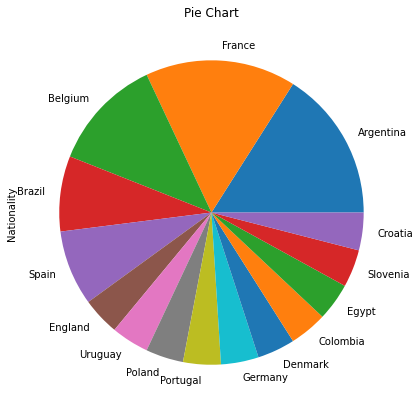

In [72]:
# Pie chart to check the nationality of the players
df_fifa["Nationality"][:25].value_counts().plot.pie(figsize = (7, 7))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

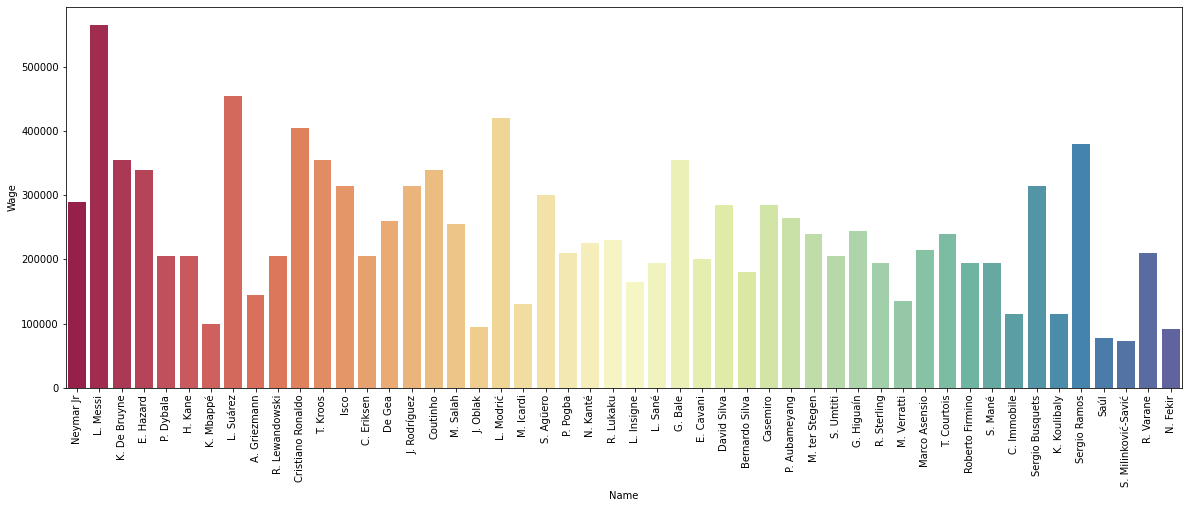

In [73]:
# Bar plot for highest wage players in the world
plt.figure(figsize = (20, 7))
plt.xticks(rotation = 90)
sns.barplot(x =  df_fifa["Name"][:50], y =  df_fifa["Wage"], palette = "Spectral");

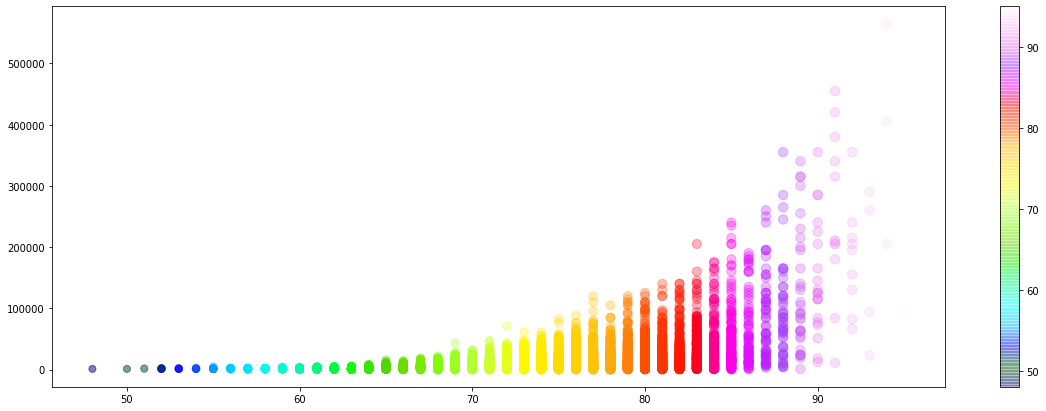

In [74]:
# Scatter plot for player potential vs wage
x = df_fifa["Potential"]
y = df_fifa["Wage"]
colors = df_fifa["Potential"]
sizes = df_fifa["Potential"]

plt.figure(figsize = (20, 7))
plt.scatter(x,
            y,
            c = colors,
            s = sizes,
            alpha = 0.3,
            cmap = 'gist_ncar')
plt.colorbar();

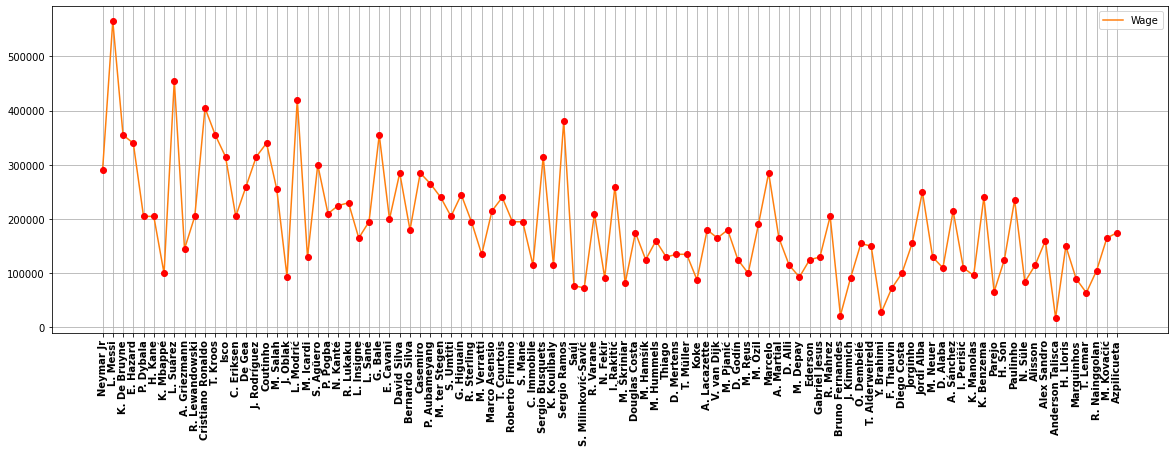

In [75]:
# Line plot for highest wage players in the wolrds
plt.figure(figsize = (20, 6))
plt.plot(df_fifa["Name"][:100], df_fifa["Wage"][:100], color = 'tab:orange')
plt.plot(df_fifa["Name"][:100], df_fifa["Wage"][:100], "o", color = 'Red')
plt.legend(["Wage"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

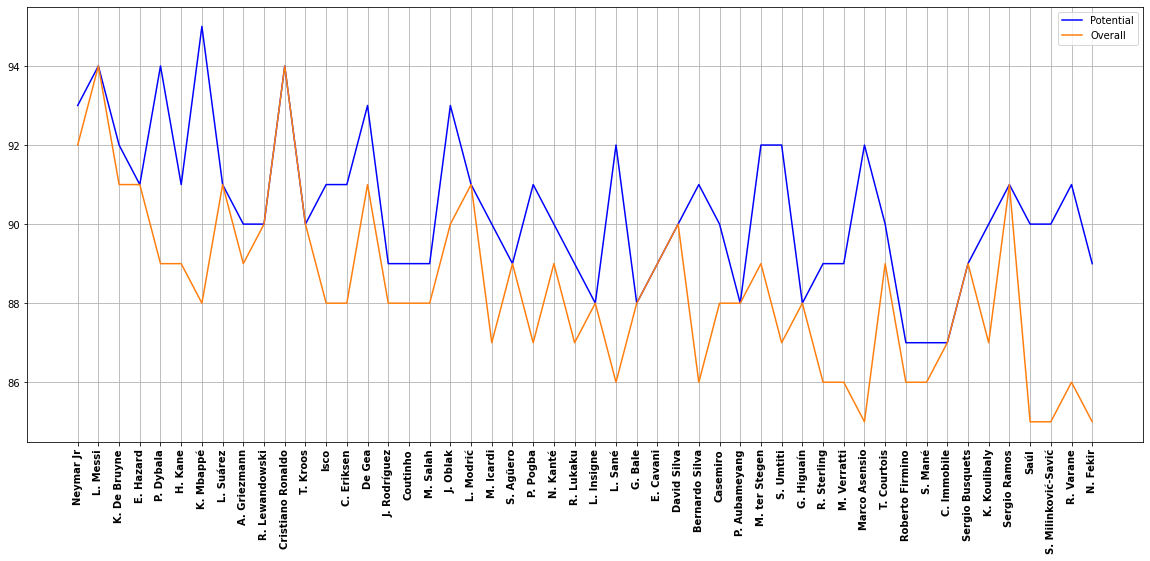

In [76]:
# line plot for potential vs overall ratings
plt.figure(figsize = (20, 8))
plt.plot(df_fifa["Name"][:50], df_fifa["Potential"][:50], color = 'blue')
plt.plot(df_fifa["Name"][:50], df_fifa["Overall"][:50], color = 'tab:orange')
plt.legend(["Potential", "Overall"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

In [77]:
# Convert weight to numericals values
df_fifa["Weight"] = df_fifa["Weight"].str.replace('lbs', '')
df_fifa["Weight"]

2       150
0       159
4       154
5       163
15      165
       ... 
6644    148
3898    154
7491    172
3625    174
6511    183
Name: Weight, Length: 18207, dtype: object

In [78]:
df_fifa["Weight"].fillna((df_fifa["Weight"].median()), inplace = True)
df_fifa["Weight"] = df_fifa["Weight"].astype(np.int64)

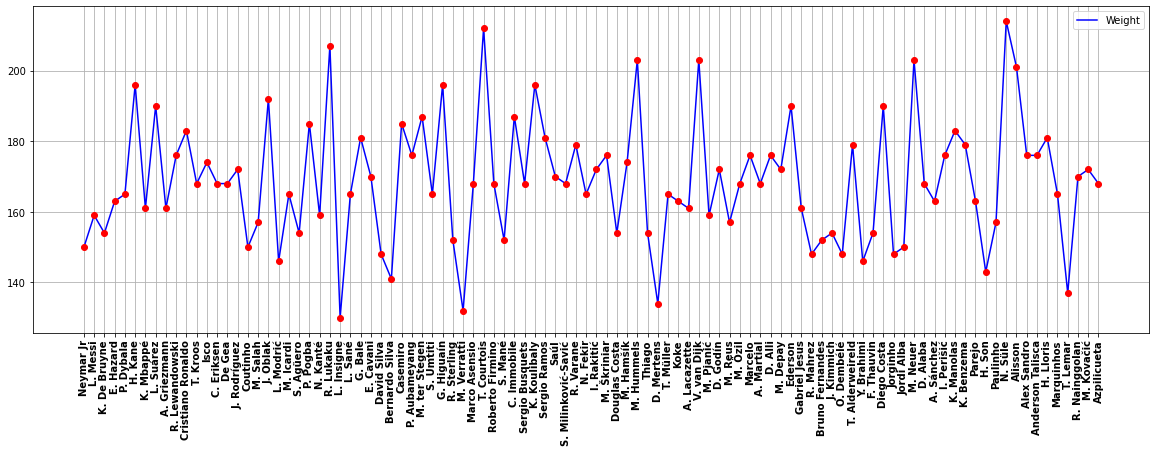

In [79]:
# Line plot for weights of the players
plt.figure(figsize = (20, 6))
plt.plot(df_fifa["Name"][:100], df_fifa["Weight"][:100], color = 'blue')
plt.plot(df_fifa["Name"][:100], df_fifa["Weight"][:100], "o", color = 'Red')
plt.legend(["Weight"], loc = "upper right")
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

In [80]:
df_fifa["Height"] = df_fifa["Height"].fillna(df_fifa["Height"].mode()[0])
df_fifa["Height"] = df_fifa['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54)

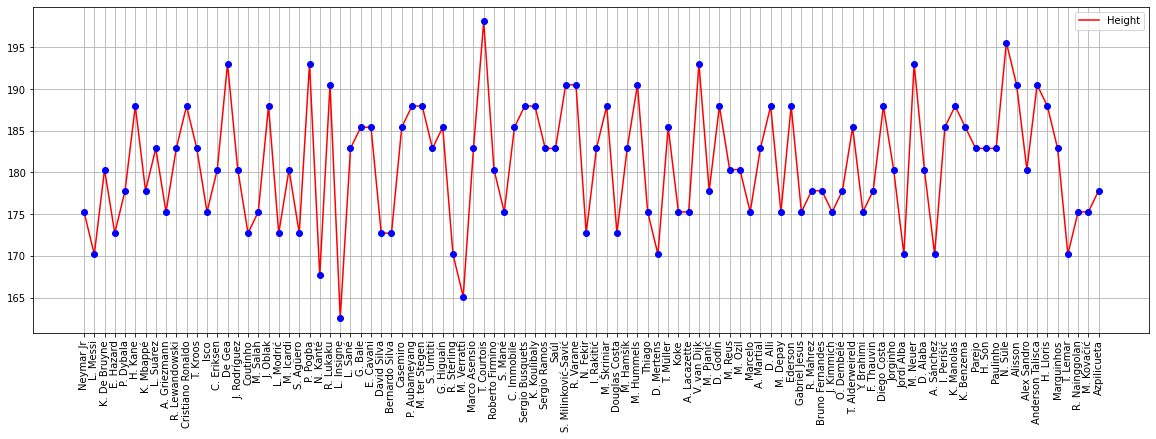

In [82]:
# Line plot for heights of the players
plt.figure(figsize = (20, 6))
plt.plot(df_fifa["Name"][:100], df_fifa["Height"][:100], color = 'Red')
plt.plot(df_fifa["Name"][:100], df_fifa["Height"][:100], "o", color = 'Blue')
plt.legend(["Height"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90)
plt.show()

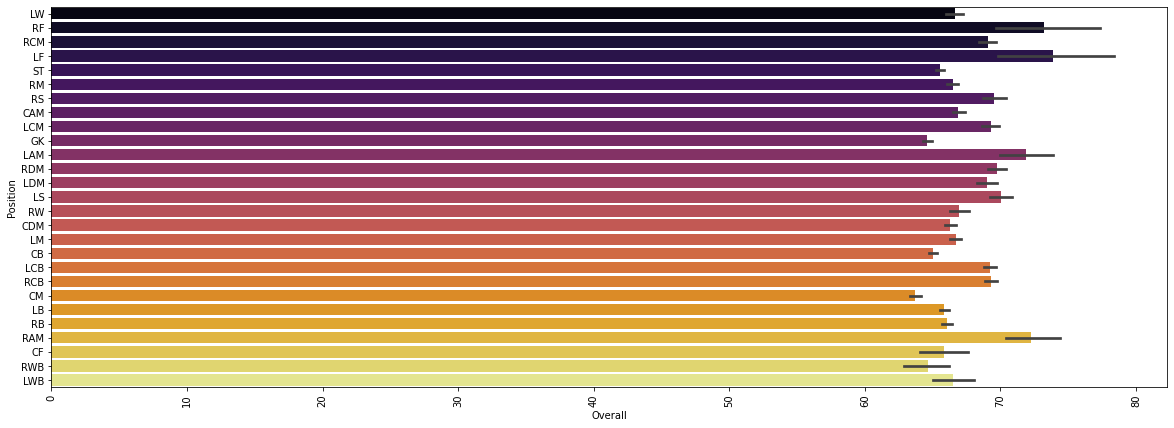

In [83]:
# Bar plot for position playes vs overall rating
plt.figure(figsize = (20, 7))
plt.xticks(rotation = 90)
sns.barplot(x = df_fifa["Overall"], y = df_fifa["Position"], palette = "inferno");

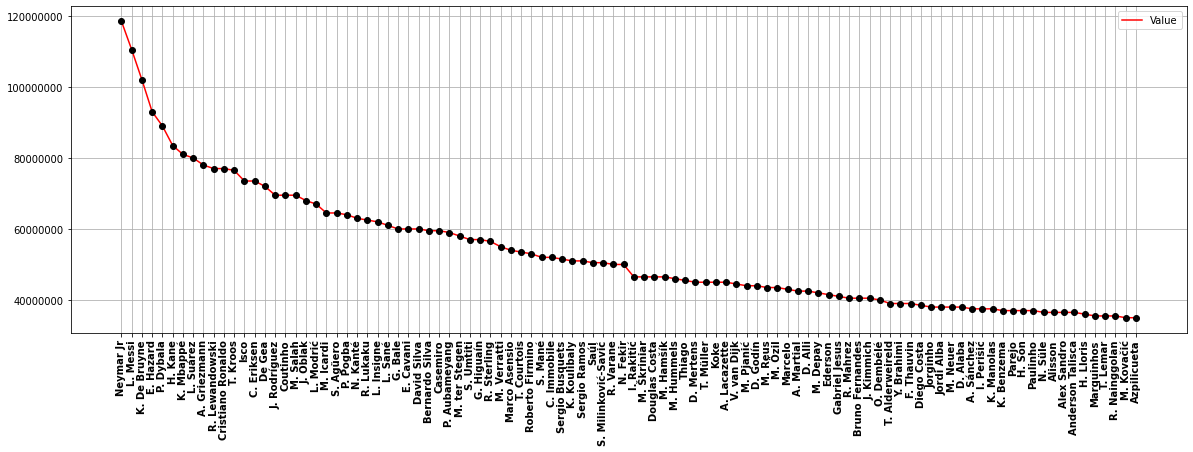

In [84]:
# Line plot for value of a player in therm of money
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(df_fifa["Name"][:100], df_fifa["Value"][:100], color = 'Red')
plt.plot(df_fifa["Name"][:100], df_fifa["Value"][:100], "o", color = 'Black')
plt.legend(["Value"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

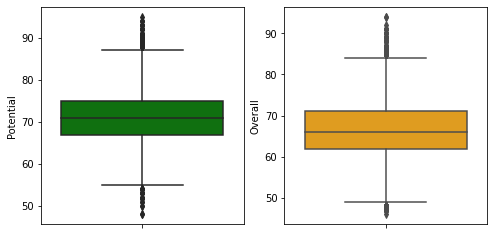

In [85]:
# Box plot for overall rating vs potential of players
f, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.boxplot(y = df_fifa["Potential"], orient = 'v', ax = axes[0], color = "green");
sns.boxplot(y = df_fifa["Overall"], orient = 'v', ax = axes[1], color = "orange");

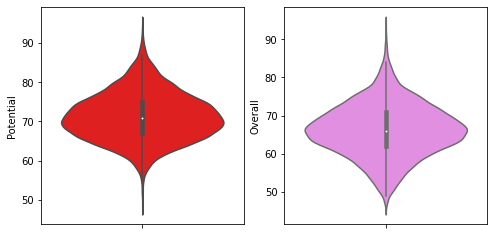

In [86]:
# violin plot for overall rating vs potential of players
f, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.violinplot(y = df_fifa["Potential"], orient = 'v', ax = axes[0], color = "red");
sns.violinplot(y = df_fifa["Overall"], orient = 'v', ax = axes[1], color = "violet");

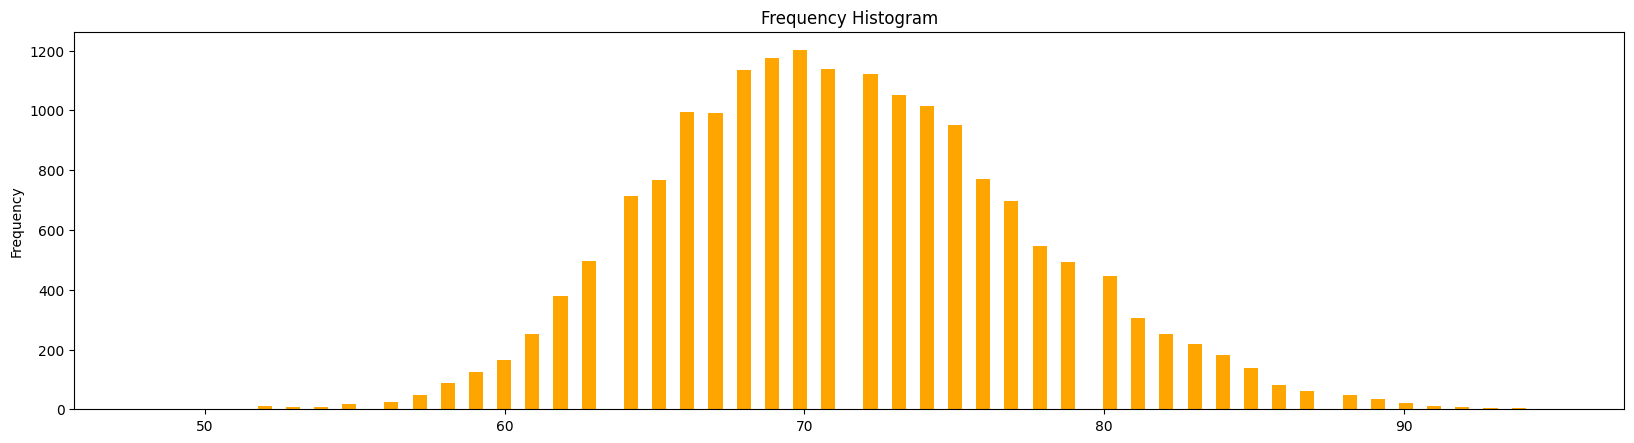

In [87]:
# Checking the distribution of players potential
plt.rcParams.update({'figure.figsize':(20, 5), 'figure.dpi' : 100})
kwargs = dict(hist_kws = {'alpha' : .6}, kde_kws = {'linewidth' : 2})
plt.hist(df_fifa["Potential"], bins = 100, color = "orange")
plt.gca().set(title = 'Frequency Histogram', ylabel = 'Frequency');

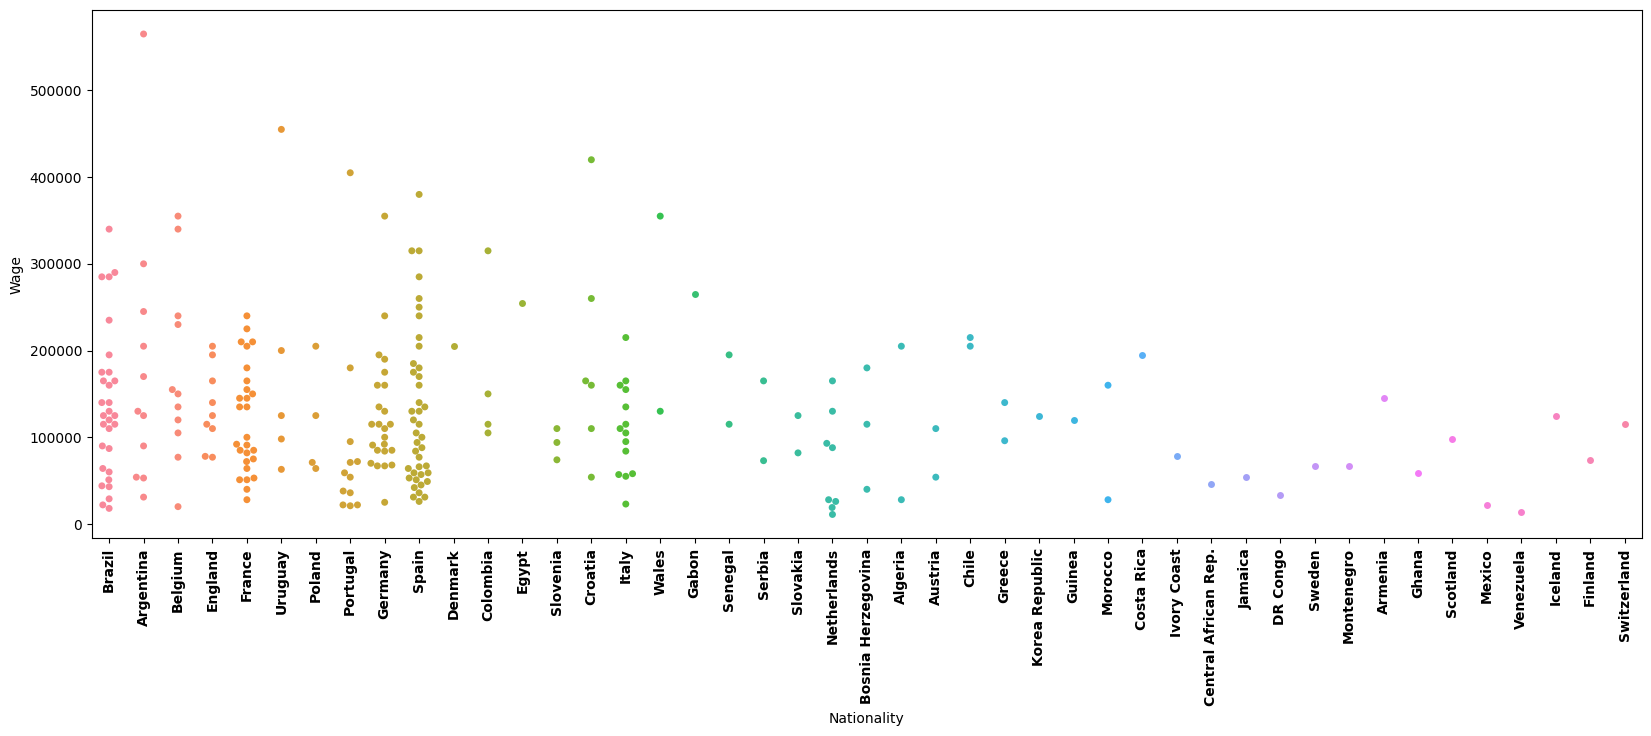

In [88]:
# Swarmplot for nationality vs wages
plt.figure(figsize = (20, 7))
plt.xticks(rotation = 90, fontweight = 'bold')
sns.swarmplot(df_fifa["Nationality"][:250], df_fifa["Wage"]);

In [89]:
# Correlation between diffrents features
df_fifa.corr()

,ID,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.138194,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.075022,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.627085,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.576218,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,-0.138194,0.075022,0.627085,0.576218,1.000000,0.377738,0.653176,0.165221,0.315651,-0.095132,...,0.239033,0.450352,0.133862,0.108402,0.087735,-0.028596,-0.028894,-0.030923,-0.027892,-0.028544
Special,-0.231352,0.236695,0.606960,0.383727,0.377738,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.653176,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.165221,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.315651,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.095132,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


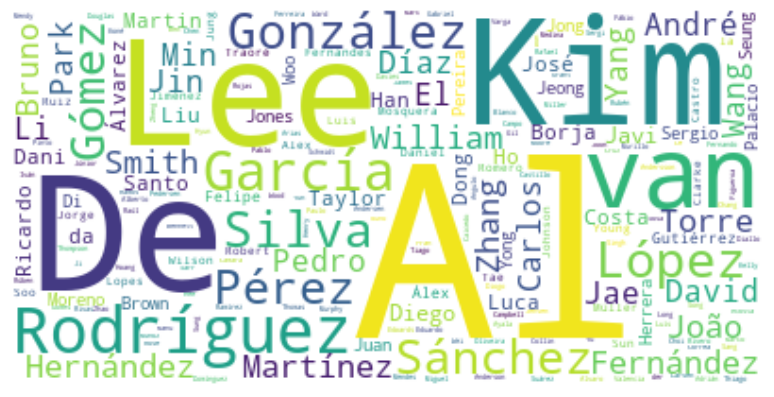

In [90]:
# Wolrd cloud on name of players
text = " ".join(Name for Name in df_fifa.Name)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [91]:
# Convert jersey number to numerical values
df_fifa["Jersey Number"] = df_fifa["Jersey Number"].fillna(df_fifa["Jersey Number"].mode()[0])
df_fifa["Jersey Number"] = df_fifa["Jersey Number"].astype(np.int64)
df_fifa["Jersey Number"].value_counts()

8     672
7     604
10    593
11    590
6     586
     ... 
65      4
79      2
74      2
64      2
85      1
Name: Jersey Number, Length: 99, dtype: int64

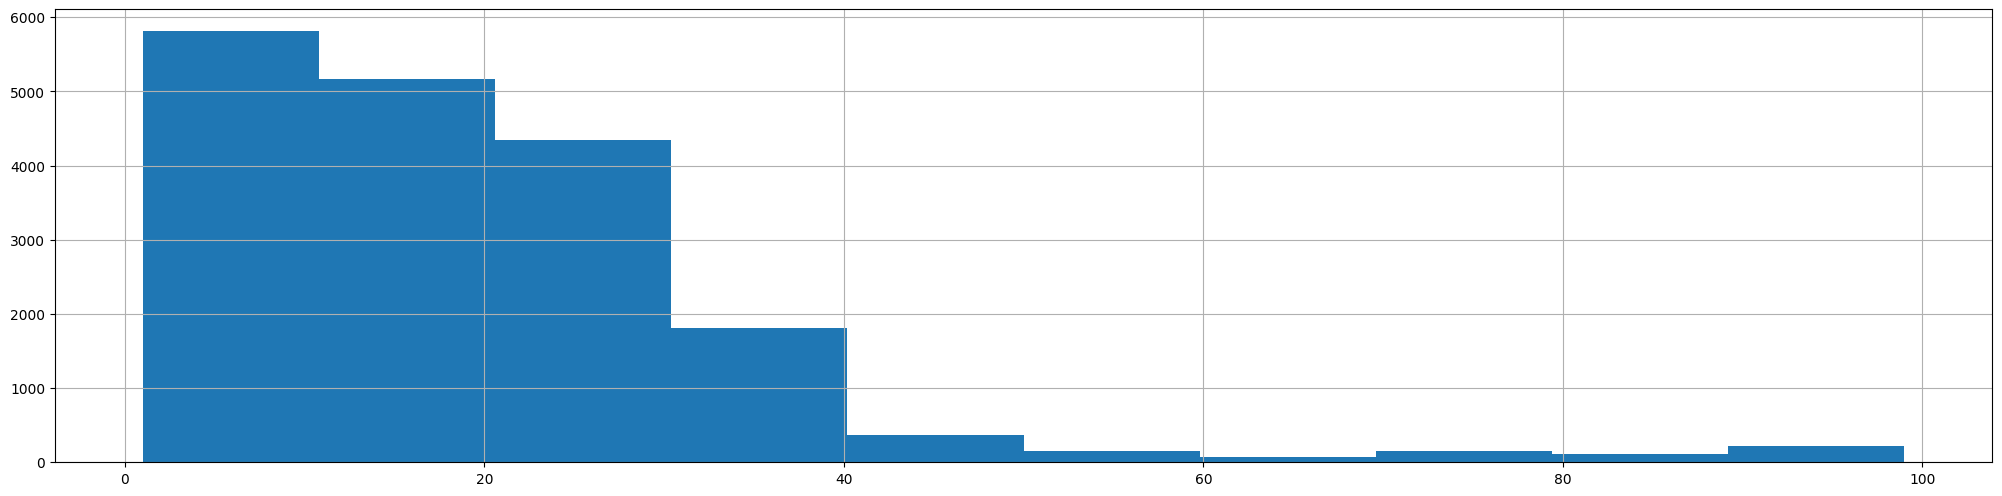

In [92]:
# Histogram on jersey number of players
fig = plt.figure(figsize = (25, 6))
df_fifa["Jersey Number"].hist();

In [93]:
# Checking the Work Rate of Players
df_fifa["Work Rate"] = df_fifa["Work Rate"].fillna(df_fifa["Work Rate"].mode()[0])
df_fifa["Work Rate"].value_counts()

Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

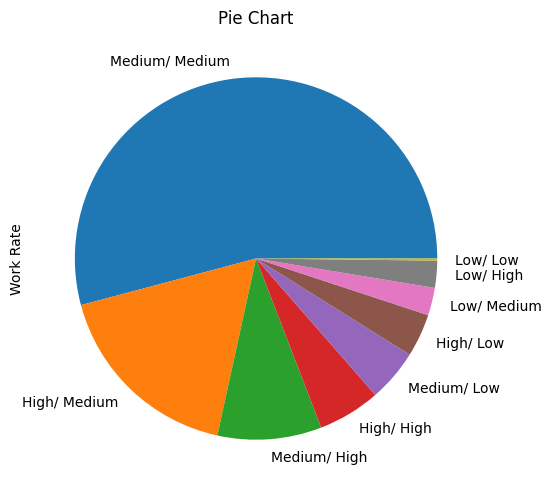

In [94]:
# Pie Chart on Work Rate of Players
df_fifa["Work Rate"].value_counts().plot.pie(figsize = (6, 6))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

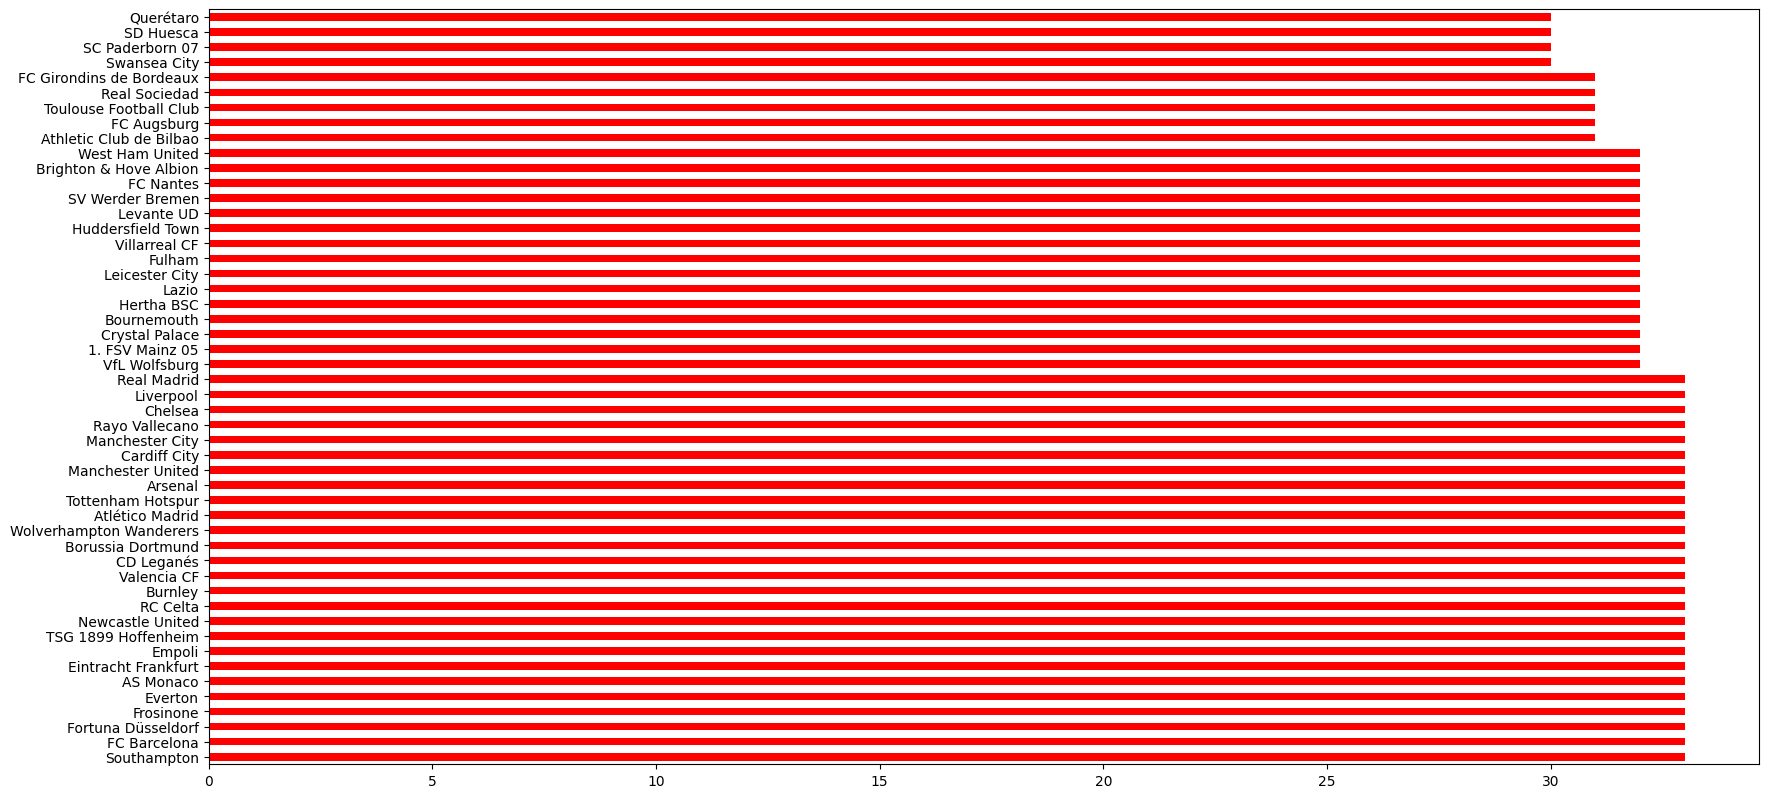

<Figure size 2000x600 with 0 Axes>

In [95]:
# Bar Plot on Players' Clubs
plt.figure(figsize = (20, 10))
df_fifa["Club"].value_counts()[:50].plot(kind = 'barh', colormap = 'autumn');plt.figure(figsize = (20, 6));

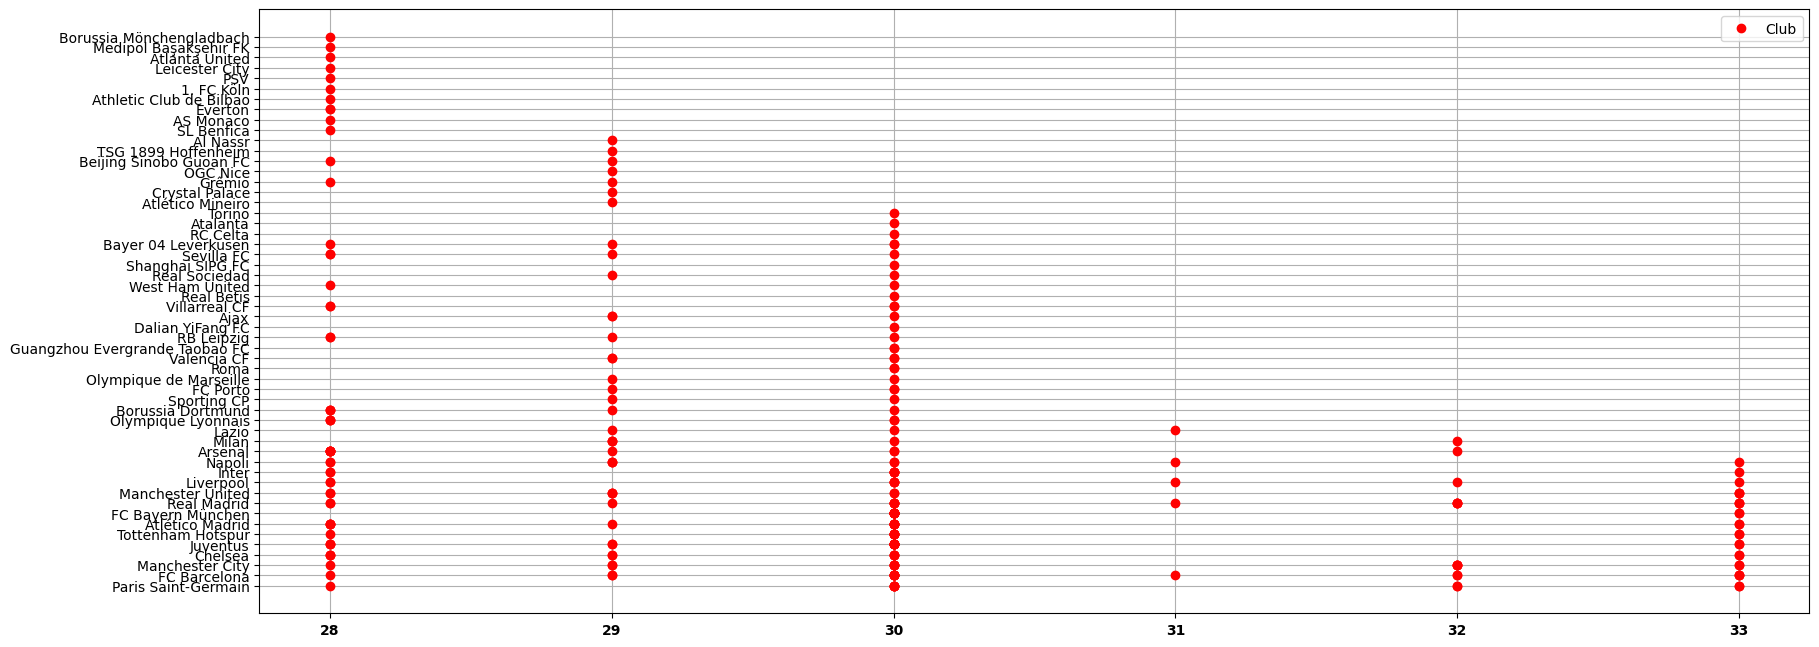

In [96]:
# Checking in which Club most number of Players belongs to
plt.figure(figsize = (20, 8))
plt.ticklabel_format(style = 'plain')
plt.plot(df_fifa["Club"].value_counts()[:250], df_fifa["Club"][:250], "o", color = 'Red')
plt.legend(["Club"], loc ="upper right")
plt.grid()
plt.xticks(fontweight = 'bold')
plt.show()

In [97]:
################################## Lionel Messi ##################################

L_Messi_Crossing = df_fifa.iloc[0]['Crossing'].astype(np.int64)
L_Messi_Finishing = df_fifa.iloc[0]['Finishing'].astype(np.int64)
L_Messi_HeadingAccuracy = df_fifa.iloc[0]['HeadingAccuracy'].astype(np.int64)
L_Messi_ShortPassing = df_fifa.iloc[0]['ShortPassing'].astype(np.int64)
L_Messi_Volleys = df_fifa.iloc[0]['Volleys'].astype(np.int64)
L_Messi_Dribbling = df_fifa.iloc[0]['Dribbling'].astype(np.int64)
L_Messi_FKAccuracy = df_fifa.iloc[0]['FKAccuracy'].astype(np.int64)
L_Messi_LongPassing = df_fifa.iloc[0]['LongPassing'].astype(np.int64)
L_Messi_BallControl = df_fifa.iloc[0]['BallControl'].astype(np.int64)
L_Messi_Acceleration = df_fifa.iloc[0]['Acceleration'].astype(np.int64)
L_Messi_SprintSpeed = df_fifa.iloc[0]['SprintSpeed'].astype(np.int64)
L_Messi_Balance = df_fifa.iloc[0]['Balance'].astype(np.int64)
L_Messi_ShotPower = df_fifa.iloc[0]['ShotPower'].astype(np.int64)
L_Messi_Stamina = df_fifa.iloc[0]['Stamina'].astype(np.int64)
L_Messi_Strength = df_fifa.iloc[0]['Strength'].astype(np.int64)
L_Messi_LongShots = df_fifa.iloc[0]['LongShots'].astype(np.int64)
L_Messi_Interceptions = df_fifa.iloc[0]['Interceptions'].astype(np.int64)
L_Messi_Positioning = df_fifa.iloc[0]['Positioning'].astype(np.int64)
L_Messi_Penalties = df_fifa.iloc[0]['Penalties'].astype(np.int64)
L_Messi_Composure = df_fifa.iloc[0]['Composure'].astype(np.int64)

################################## Cristiano Ronaldo ##################################
C_Ronaldo_Crossing = df_fifa.iloc[1]['Crossing'].astype(np.int64)
C_Ronaldo_Finishing = df_fifa.iloc[1]['Finishing'].astype(np.int64)
C_Ronaldo_HeadingAccuracy = df_fifa.iloc[1]['HeadingAccuracy'].astype(np.int64)
C_Ronaldo_ShortPassing = df_fifa.iloc[1]['ShortPassing'].astype(np.int64)
C_Ronaldo_Volleys = df_fifa.iloc[1]['Volleys'].astype(np.int64)
C_Ronaldo_Dribbling = df_fifa.iloc[1]['Dribbling'].astype(np.int64)
C_Ronaldo_FKAccuracy = df_fifa.iloc[1]['FKAccuracy'].astype(np.int64)
C_Ronaldo_LongPassing = df_fifa.iloc[1]['LongPassing'].astype(np.int64)
C_Ronaldo_BallControl = df_fifa.iloc[1]['BallControl'].astype(np.int64)
C_Ronaldo_Acceleration = df_fifa.iloc[1]['Acceleration'].astype(np.int64)
C_Ronaldo_SprintSpeed = df_fifa.iloc[1]['SprintSpeed'].astype(np.int64)
C_Ronaldo_Balance = df_fifa.iloc[1]['Balance'].astype(np.int64)
C_Ronaldo_ShotPower = df_fifa.iloc[1]['ShotPower'].astype(np.int64)
C_Ronaldo_Stamina = df_fifa.iloc[1]['Stamina'].astype(np.int64)
C_Ronaldo_Strength = df_fifa.iloc[1]['Strength'].astype(np.int64)
C_Ronaldo_LongShots = df_fifa.iloc[1]['LongShots'].astype(np.int64)
C_Ronaldo_Interceptions = df_fifa.iloc[1]['Interceptions'].astype(np.int64)
C_Ronaldo_Positioning = df_fifa.iloc[1]['Positioning'].astype(np.int64)
C_Ronaldo_Penalties = df_fifa.iloc[1]['Penalties'].astype(np.int64)
C_Ronaldo_Composure = df_fifa.iloc[1]['Composure'].astype(np.int64)

In [98]:
# Radar Plot for Statistical Comparison Between Lionel Messi and Cristiano Ronaldo
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'polar'}] * 2] * 1)

fig.add_trace(go.Scatterpolar(r = [L_Messi_Crossing, L_Messi_Finishing, L_Messi_HeadingAccuracy, L_Messi_ShortPassing, L_Messi_Volleys, L_Messi_Dribbling, L_Messi_FKAccuracy, L_Messi_LongPassing, L_Messi_BallControl, L_Messi_Acceleration, L_Messi_SprintSpeed, L_Messi_Balance, L_Messi_ShotPower, L_Messi_Stamina, L_Messi_Strength, L_Messi_LongShots, L_Messi_Positioning, L_Messi_Penalties, L_Messi_Composure],
                                       theta = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Balance', 'ShotPower', 'Stamina', 'Strength', 'LongShots', 'Positioning', 'Penalties', 'Composure'],
                                       fill = 'toself', name = "L. Messi"), 1, 1)

fig.add_trace(go.Scatterpolar(r = [C_Ronaldo_Crossing, C_Ronaldo_Finishing, C_Ronaldo_HeadingAccuracy, C_Ronaldo_ShortPassing, C_Ronaldo_Volleys, C_Ronaldo_Dribbling, C_Ronaldo_FKAccuracy, C_Ronaldo_LongPassing, C_Ronaldo_BallControl, C_Ronaldo_Acceleration, C_Ronaldo_SprintSpeed, C_Ronaldo_Balance, C_Ronaldo_ShotPower, C_Ronaldo_Stamina, C_Ronaldo_Strength, C_Ronaldo_LongShots, C_Ronaldo_Positioning, C_Ronaldo_Penalties, C_Ronaldo_Composure],
                                       theta = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Balance', 'ShotPower', 'Stamina', 'Strength', 'LongShots', 'Positioning', 'Penalties', 'Composure'],
                                       fill = 'toself', name = "C. Ronaldo"), 1, 2)

fig.update_layout(polar = dict(radialaxis = dict(visible = True),), showlegend = True)

fig.update_layout(title = {'y':0.90,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'font': {'size': 30}})

fig.update_layout(font = {'color': "Black",
                          'family': "Arial"},
                  title_text = "Stats Comparison: Lionel Messi vs Cristiano Ronaldo")

fig.show()

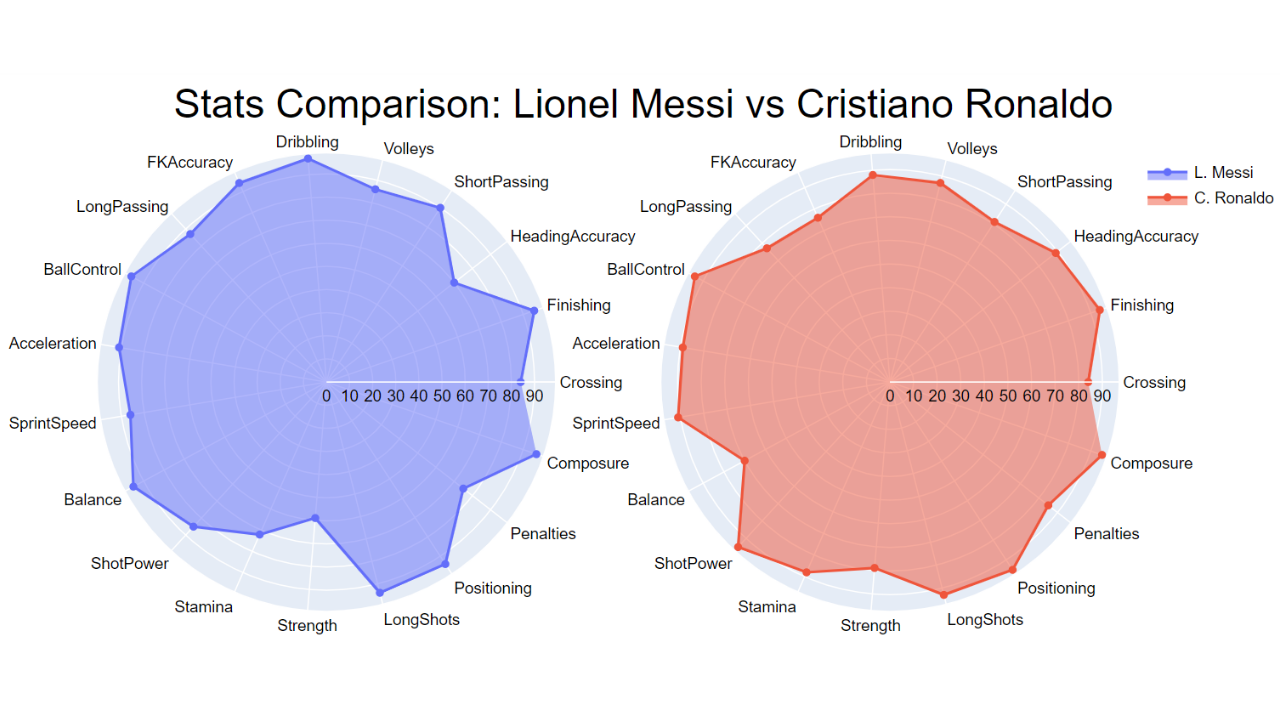

<Figure size 2000x700 with 0 Axes>

In [99]:
plt.figure(figsize = (20, 7))
Image("https://i.imgur.com/g0bgC5a.png")

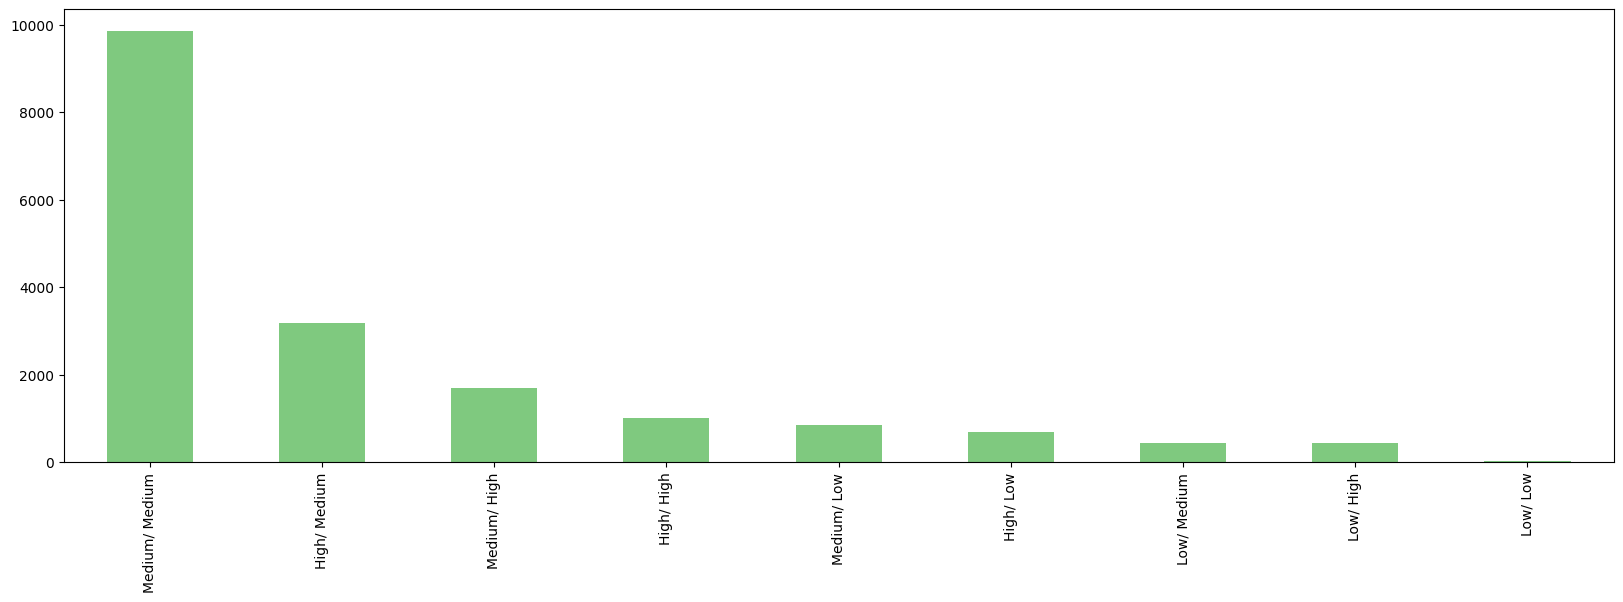

In [100]:
# Bar Plot on Work Rate of Players
plt.figure(figsize = (20, 6))
df_fifa["Work Rate"].value_counts()[:50].plot(kind = 'bar', colormap = 'Accent');

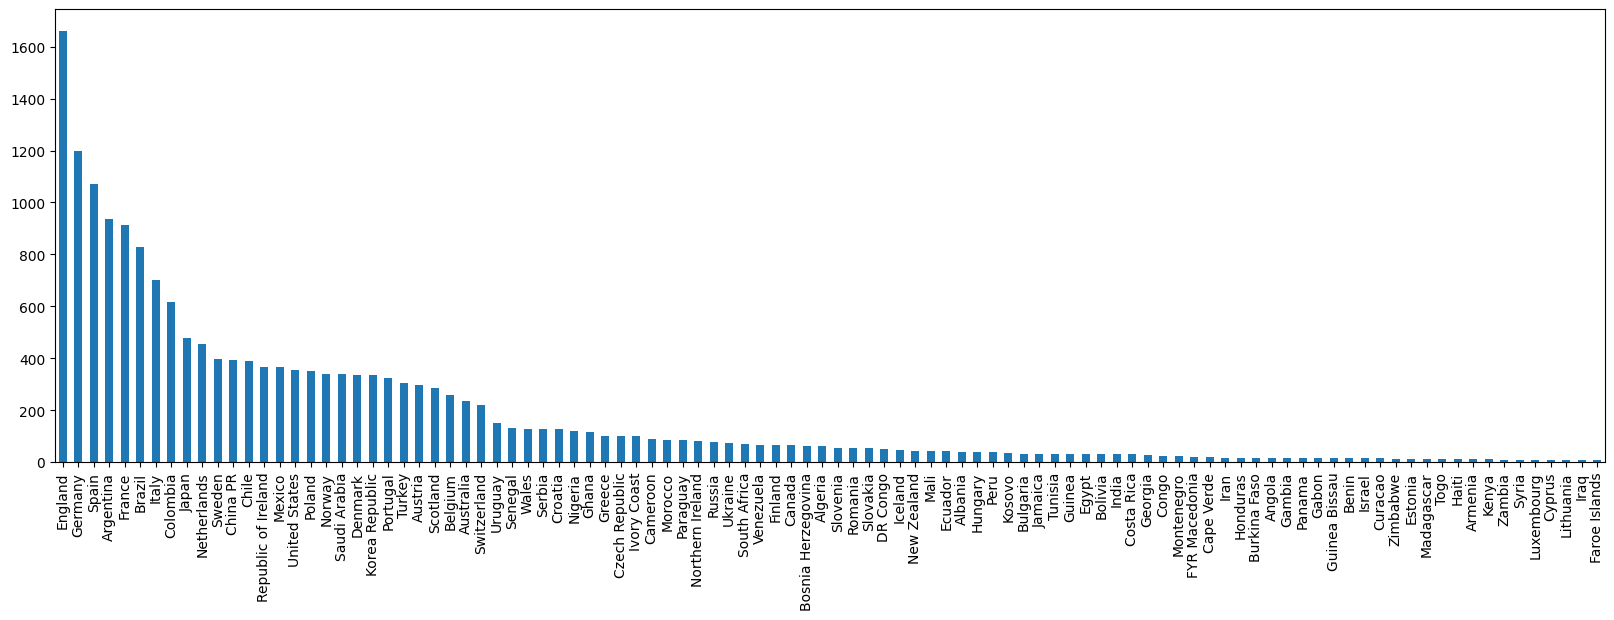

In [101]:
# Bar Plot for checking the Nationality of Players
plt.figure(figsize = (20, 6))
df_fifa["Nationality"].value_counts()[:100].plot(kind = 'bar');

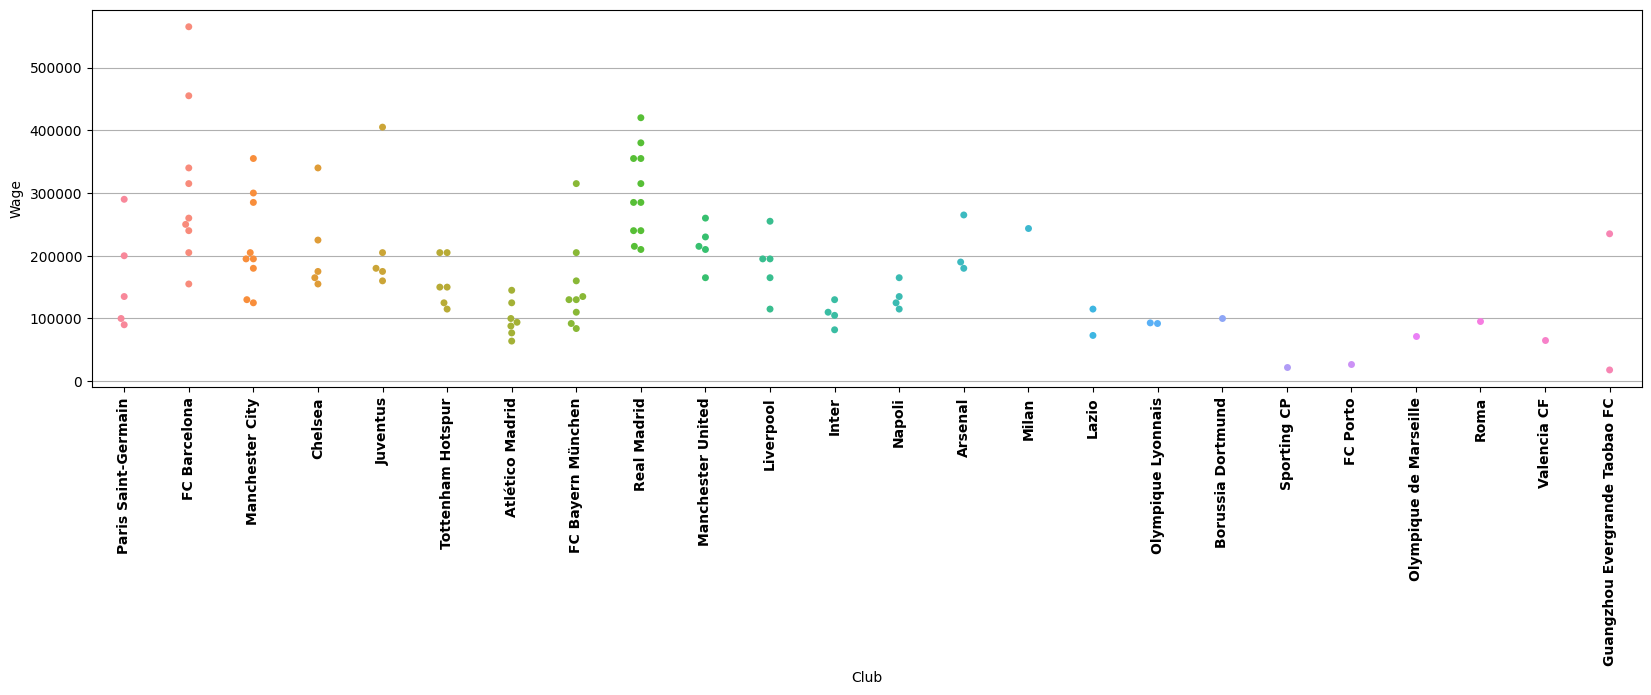

In [102]:
# Swarmplot for checking in which Club most number of Players belongs to
plt.figure(figsize = (20, 5))
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
sns.swarmplot(df_fifa["Club"][:100], df_fifa["Wage"]);

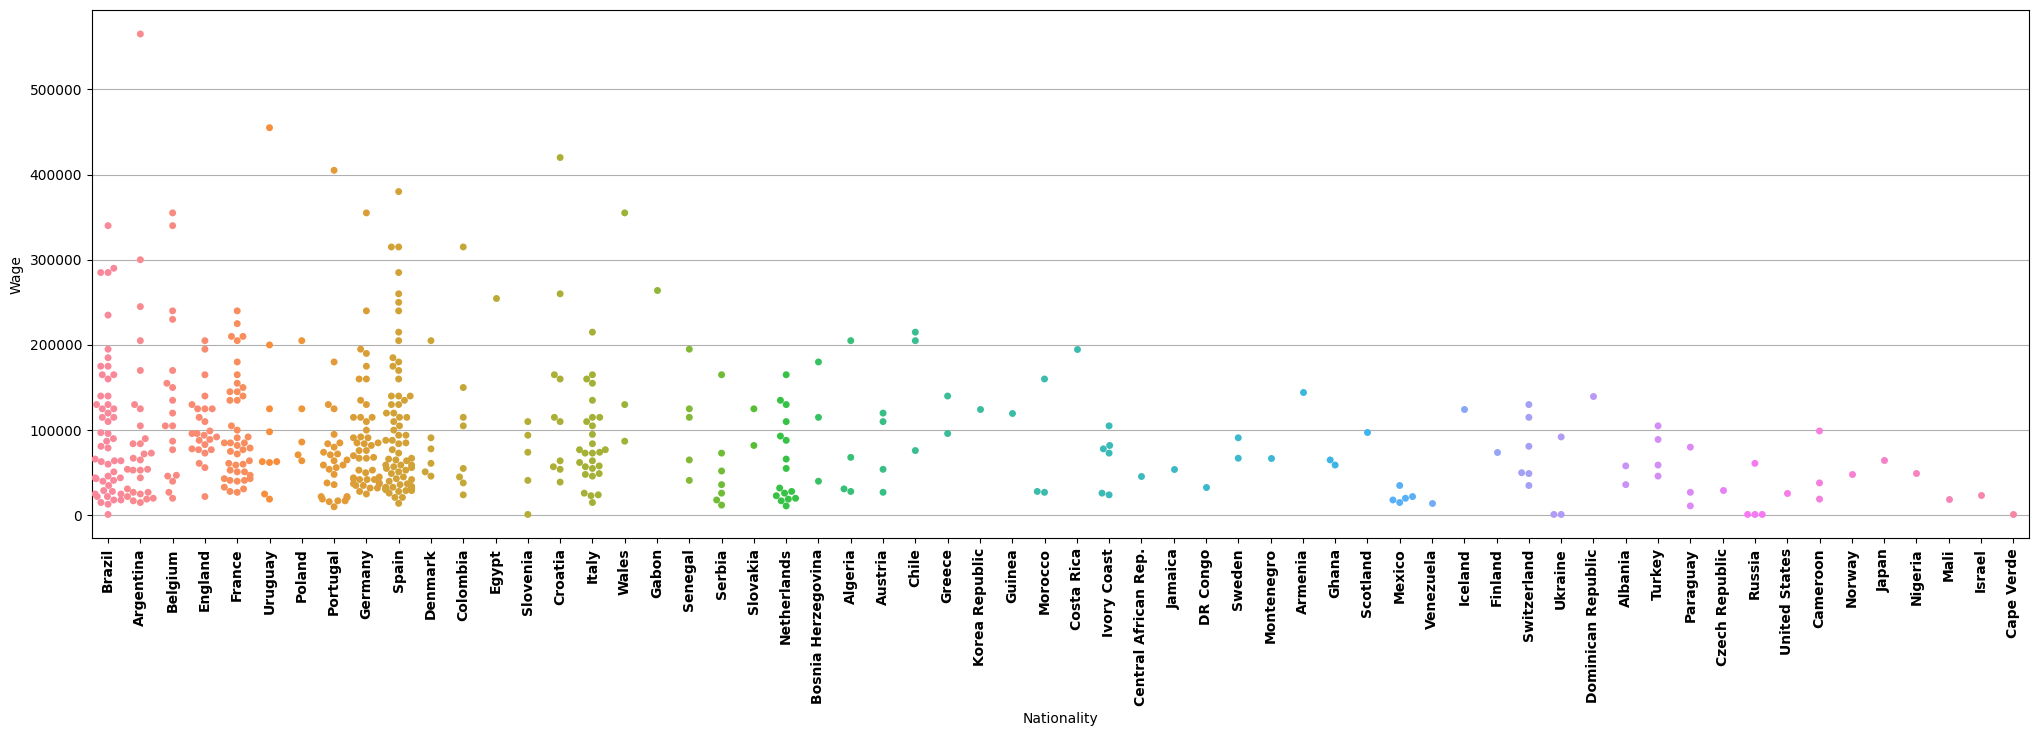

In [103]:
# Swarmplot for checking from which Country most number of Players comes from
plt.figure(figsize = (25, 7))
plt.grid()
plt.xticks(rotation = 90, fontweight = 'bold')
sns.swarmplot(df_fifa["Nationality"][:500], df_fifa["Wage"]);

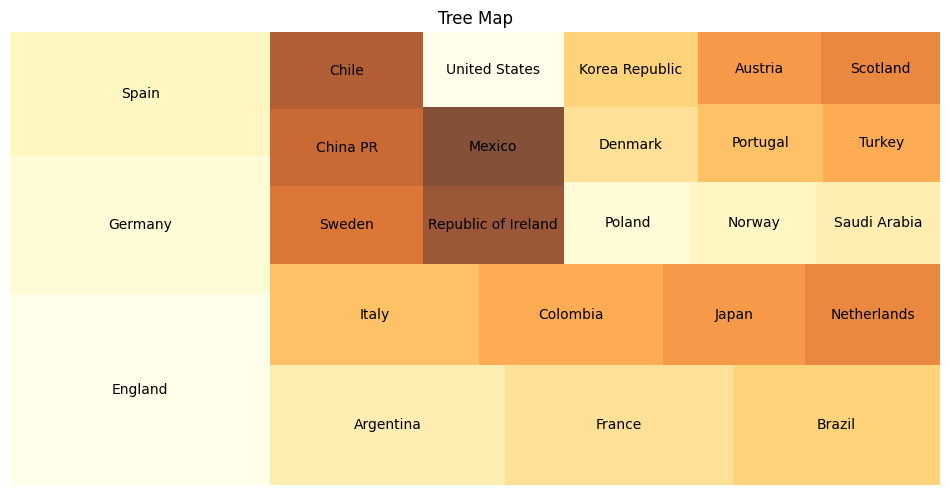

In [109]:
# Tree Map for Nationality of Players
y = df_fifa["Nationality"].value_counts()[:25]
plt.rcParams["figure.figsize"] = (12, 6)
color = plt.cm.YlOrBr(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off");

In [111]:
# Scatter Plot on Players Age vs Wages
fig = px.scatter(df_fifa, x = "Age", y = "Wage", color = "Age")
fig.show()

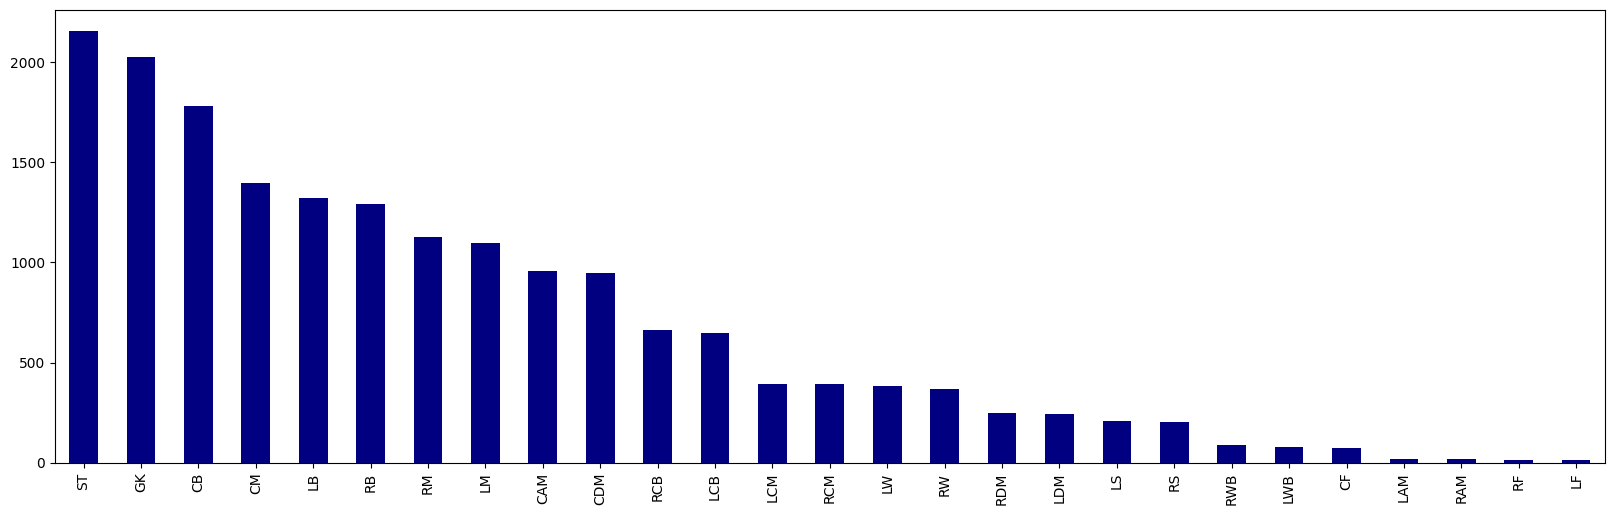

In [112]:
# Bar Plot for playing Positions of Players
plt.figure(figsize = (20, 6))
df_fifa["Position"].value_counts().plot(kind = 'bar', colormap = 'jet');

In [113]:
# Scatter Plot on Players Potential vs Wages
fig = px.scatter(df_fifa, x = "Potential", y = "Wage", color = "Potential")
fig.show()

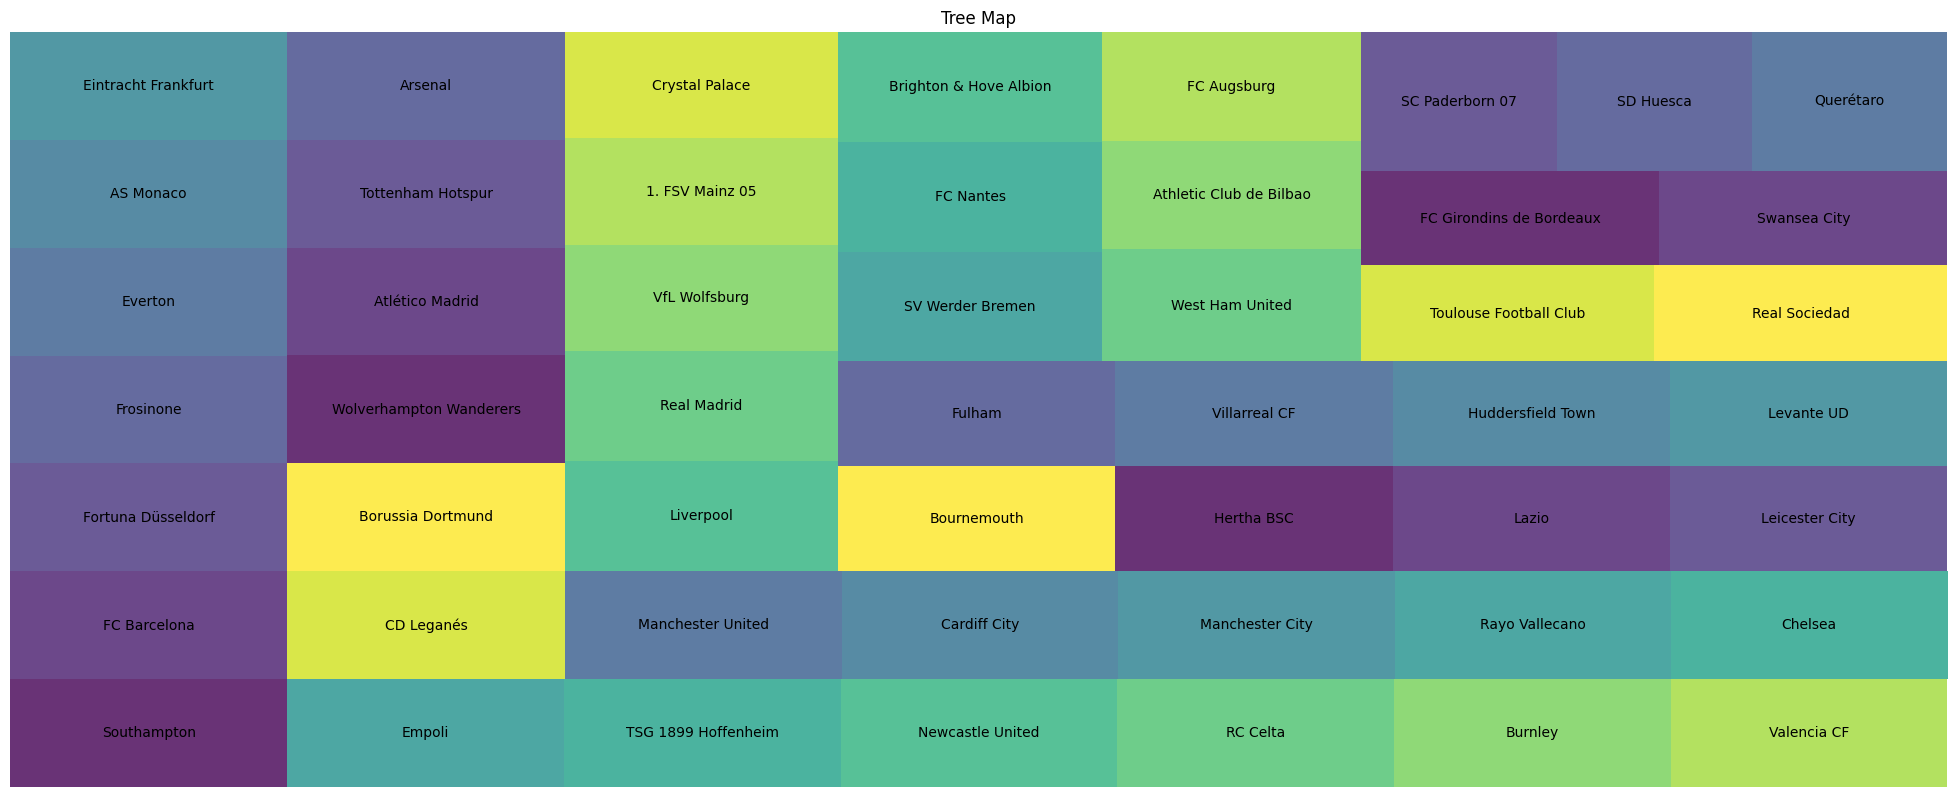

In [114]:
# Tree Map for Clubs of Players
y = df_fifa["Club"].value_counts()[:50]
plt.rcParams["figure.figsize"] = (25, 10)
color = plt.cm.viridis(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off");

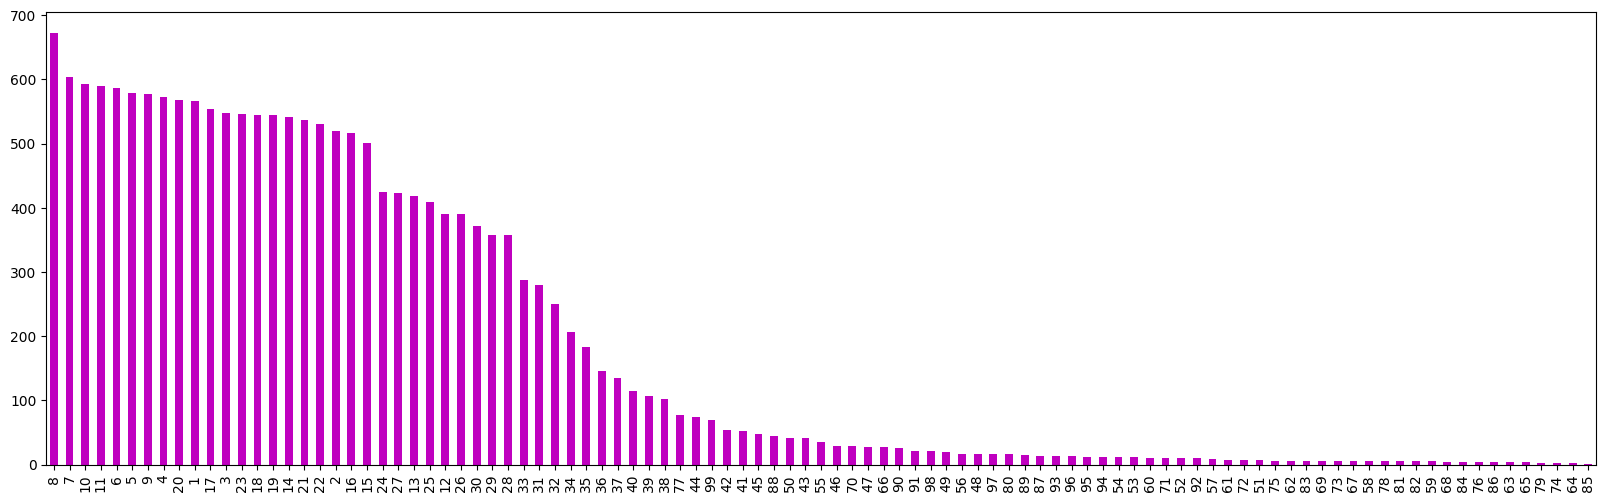

In [115]:
# Bar Plot for Checking the most used Jersey Numbers
plt.figure(figsize = (20, 6))
my_colors = ['m']
my_colormap = ListedColormap(my_colors)
df_fifa["Jersey Number"].value_counts().plot(kind = 'bar', colormap = my_colormap);

In [116]:
# Date of Joining is not in correct Date Time format here, so we will need to convert them into a Date Time format
df_fifa["Joined"] = pd.to_datetime(df_fifa["Joined"])
df_fifa["Joined"].value_counts()

2018-07-01    1538
2017-07-01    1133
2018-01-01     635
2016-07-01     614
2015-07-01     368
              ... 
2017-09-11       1
2012-05-29       1
2013-08-22       1
2017-02-06       1
2002-02-22       1
Name: Joined, Length: 1736, dtype: int64

In [117]:
df_fifa['Joined'] = pd.to_datetime(df_fifa['Joined']).dt.date
df_fifa['Joined']

2       2017-08-03
0       2004-07-01
4       2015-08-30
5       2012-07-01
15      2015-07-01
           ...    
6644           NaT
3898           NaT
7491           NaT
3625           NaT
6511           NaT
Name: Joined, Length: 18207, dtype: object

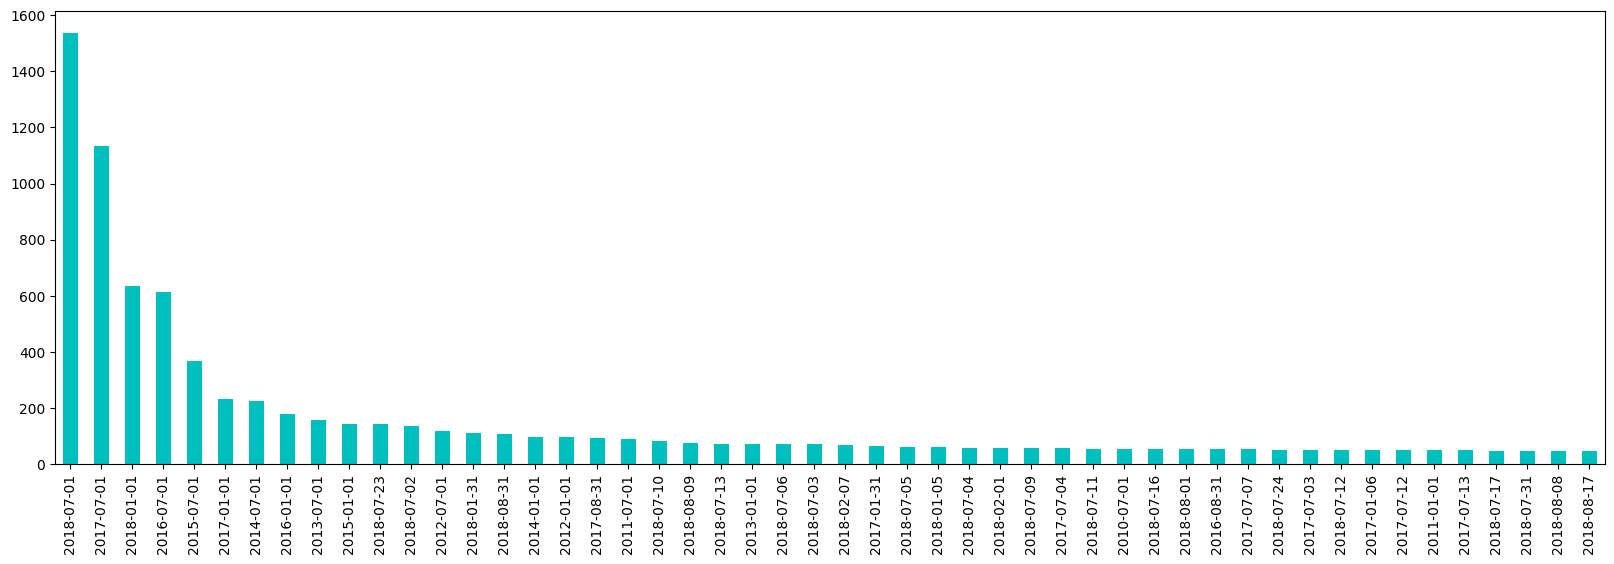

In [118]:
# Bar Plot for Date of Joining of Players
plt.figure(figsize = (20, 6))
my_colors = ['c']
my_colormap = ListedColormap(my_colors)
df_fifa["Joined"].value_counts()[:50].plot(kind = 'bar', colormap = my_colormap);

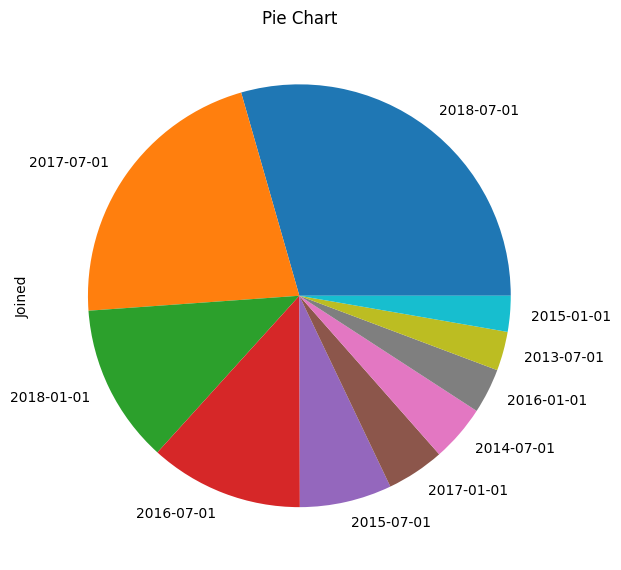

In [119]:
# Pie Chart on Date of Joining of Players
df_fifa["Joined"].value_counts()[:10].plot.pie(figsize = (7, 7))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

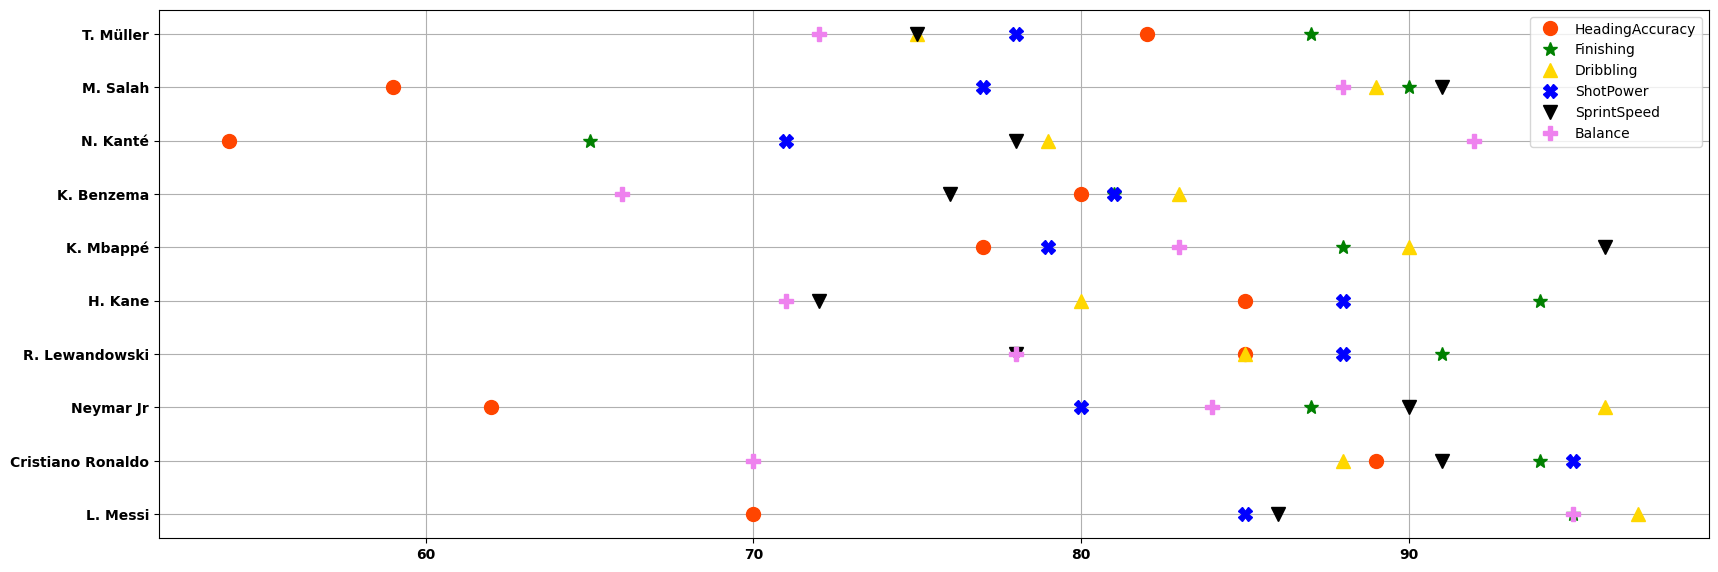

In [120]:
# Comparing Abilities of different players on different Skills
plt.figure(figsize = (20, 7))

plt.plot(df_fifa[df_fifa["ID"] == 158023]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 158023]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 158023]["Finishing"], df_fifa[df_fifa["ID"] == 158023]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 158023]["Dribbling"], df_fifa[df_fifa["ID"] == 158023]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 158023]["ShotPower"], df_fifa[df_fifa["ID"] == 158023]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 158023]["SprintSpeed"], df_fifa[df_fifa["ID"] == 158023]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 158023]["Balance"], df_fifa[df_fifa["ID"] == 158023]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 20801]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 20801]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 20801]["Finishing"], df_fifa[df_fifa["ID"] == 20801]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 20801]["Dribbling"], df_fifa[df_fifa["ID"] == 20801]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 20801]["ShotPower"], df_fifa[df_fifa["ID"] == 20801]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 20801]["SprintSpeed"], df_fifa[df_fifa["ID"] == 20801]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 20801]["Balance"], df_fifa[df_fifa["ID"] == 20801]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 190871]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 190871]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 190871]["Finishing"], df_fifa[df_fifa["ID"] == 190871]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 190871]["Dribbling"], df_fifa[df_fifa["ID"] == 190871]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 190871]["ShotPower"], df_fifa[df_fifa["ID"] == 190871]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 190871]["SprintSpeed"], df_fifa[df_fifa["ID"] == 190871]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 190871]["Balance"], df_fifa[df_fifa["ID"] == 190871]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 188545]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 188545]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 188545]["Finishing"], df_fifa[df_fifa["ID"] == 188545]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 188545]["Dribbling"], df_fifa[df_fifa["ID"] == 188545]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 188545]["ShotPower"], df_fifa[df_fifa["ID"] == 188545]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 188545]["SprintSpeed"], df_fifa[df_fifa["ID"] == 188545]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 188545]["Balance"], df_fifa[df_fifa["ID"] == 188545]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 202126]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 202126]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 202126]["Finishing"], df_fifa[df_fifa["ID"] == 202126]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 202126]["Dribbling"], df_fifa[df_fifa["ID"] == 202126]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 202126]["ShotPower"], df_fifa[df_fifa["ID"] == 202126]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 202126]["SprintSpeed"], df_fifa[df_fifa["ID"] == 202126]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 202126]["Balance"], df_fifa[df_fifa["ID"] == 202126]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 231747]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 231747]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 231747]["Finishing"], df_fifa[df_fifa["ID"] == 231747]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 231747]["Dribbling"], df_fifa[df_fifa["ID"] == 231747]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 231747]["ShotPower"], df_fifa[df_fifa["ID"] == 231747]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 231747]["SprintSpeed"], df_fifa[df_fifa["ID"] == 231747]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 231747]["Balance"], df_fifa[df_fifa["ID"] == 231747]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 165153]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 165153]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 165153]["Finishing"], df_fifa[df_fifa["ID"] == 165153]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 165153]["Dribbling"], df_fifa[df_fifa["ID"] == 165153]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 165153]["ShotPower"], df_fifa[df_fifa["ID"] == 165153]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 165153]["SprintSpeed"], df_fifa[df_fifa["ID"] == 165153]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 165153]["Balance"], df_fifa[df_fifa["ID"] == 165153]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 215914]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 215914]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 215914]["Finishing"], df_fifa[df_fifa["ID"] == 215914]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 215914]["Dribbling"], df_fifa[df_fifa["ID"] == 215914]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 215914]["ShotPower"], df_fifa[df_fifa["ID"] == 215914]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 215914]["SprintSpeed"], df_fifa[df_fifa["ID"] == 215914]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 215914]["Balance"], df_fifa[df_fifa["ID"] == 215914]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 209331]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 209331]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 209331]["Finishing"], df_fifa[df_fifa["ID"] == 209331]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 209331]["Dribbling"], df_fifa[df_fifa["ID"] == 209331]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 209331]["ShotPower"], df_fifa[df_fifa["ID"] == 209331]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 209331]["SprintSpeed"], df_fifa[df_fifa["ID"] == 209331]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 209331]["Balance"], df_fifa[df_fifa["ID"] == 209331]["Name"], 'P', markersize = 10, color = 'Violet')

plt.plot(df_fifa[df_fifa["ID"] == 189596]["HeadingAccuracy"], df_fifa[df_fifa["ID"] == 189596]["Name"], 'o', markersize = 10, color = 'Orangered')
plt.plot(df_fifa[df_fifa["ID"] == 189596]["Finishing"], df_fifa[df_fifa["ID"] == 189596]["Name"], '*', markersize = 10, color = 'Green')
plt.plot(df_fifa[df_fifa["ID"] == 189596]["Dribbling"], df_fifa[df_fifa["ID"] == 189596]["Name"], '^', markersize = 10, color = 'Gold')
plt.plot(df_fifa[df_fifa["ID"] == 189596]["ShotPower"], df_fifa[df_fifa["ID"] == 189596]["Name"], 'X', markersize = 10, color = 'Blue')
plt.plot(df_fifa[df_fifa["ID"] == 189596]["SprintSpeed"], df_fifa[df_fifa["ID"] == 189596]["Name"], 'v', markersize = 10, color = 'Black')
plt.plot(df_fifa[df_fifa["ID"] == 189596]["Balance"], df_fifa[df_fifa["ID"] == 189596]["Name"], 'P', markersize = 10, color = 'Violet')

plt.legend(["HeadingAccuracy", "Finishing", "Dribbling", "ShotPower", "SprintSpeed", "Balance"], loc = "upper right")
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.grid()
plt.show()

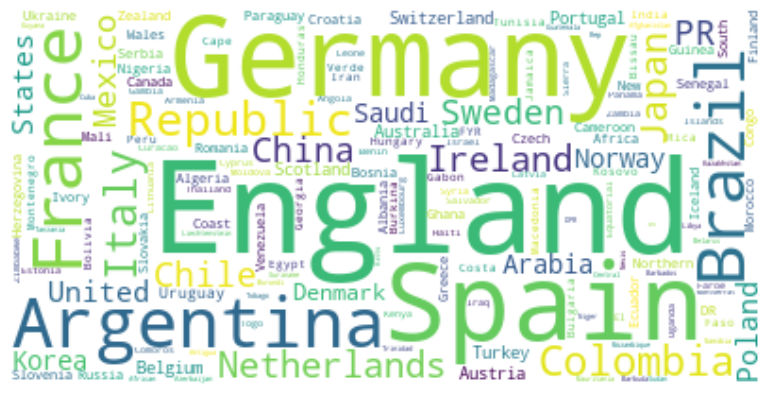

In [121]:
# World Cloud on Nationality of Players
text = " ".join(Nationality for Nationality in df_fifa.Nationality)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()